Current working file: C:\Users\Administrator\Desktop\household_power_consumption.csv

 Dataset Loaded Successfully!
Shape: (1048575, 9)

Columns: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

First 5 rows:
         Date      Time Global_active_power Global_reactive_power Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.84   
1  16/12/2006  17:25:00                5.36                 0.436  233.63   
2  16/12/2006  17:26:00               5.374                 0.498  233.29   
3  16/12/2006  17:27:00               5.388                 0.502  233.74   
4  16/12/2006  17:28:00               3.666                 0.528  235.68   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0             18.4              0              1            17.0  
1               23              0              1            16.0  
2               23       

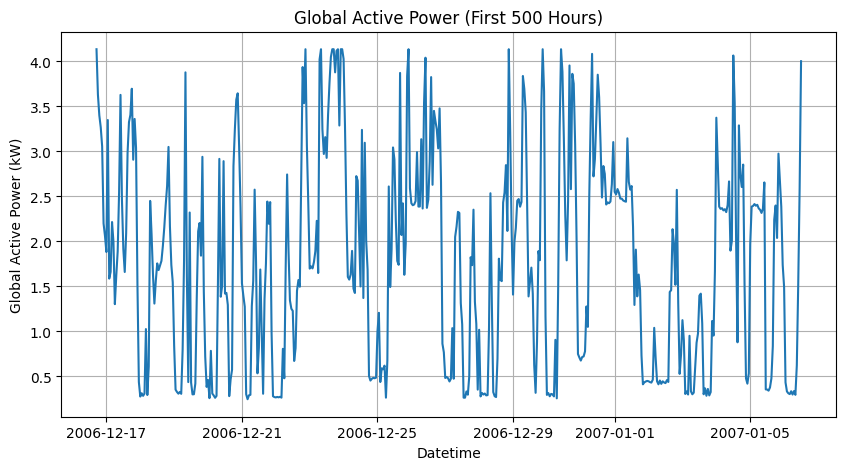

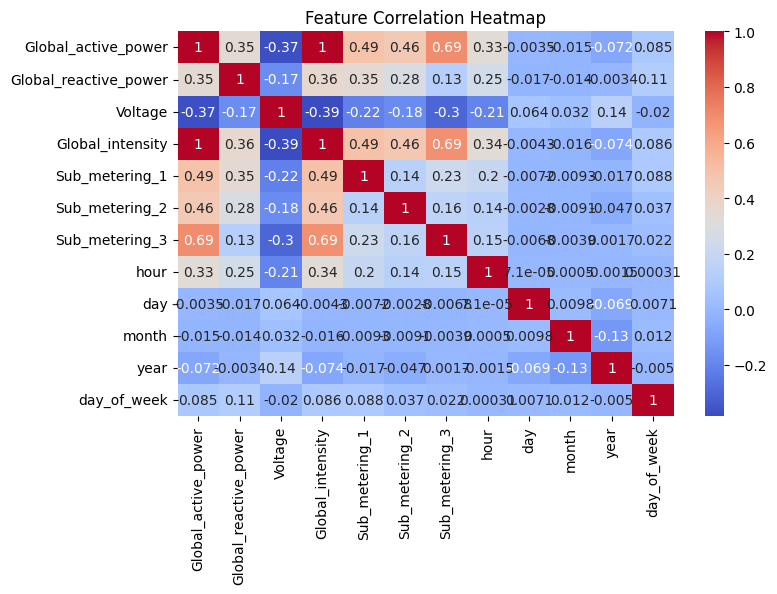


 Cleaned & Preprocessed Dataset saved successfully at:
C:\Users\Administrator\Desktop\cleaned_preprocessed_energy_data.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

file_path = r"C:\Users\Administrator\Desktop\household_power_consumption.csv"

print(f"Current working file: {file_path}")

# Read the CSV file
df = pd.read_csv(file_path, sep=",", low_memory=False)

print("\n Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

df.replace("?", np.nan, inplace=True)

numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)

df.drop(columns=['Date', 'Time'], inplace=True)

df.dropna(subset=['datetime'], inplace=True)
df.dropna(inplace=True)

df.set_index('datetime', inplace=True)

print("\n After Cleaning:")
print("Shape:", df.shape)
print("\nMissing Values per Column:\n", df.isna().sum())

df_hourly = df.resample('h').mean(numeric_only=True)

print("\n Hourly Resampling Done!")
print("New Shape:", df_hourly.shape)
print("\nSample Data:\n", df_hourly.head())

for col in numeric_cols:
    lower = df_hourly[col].quantile(0.01)
    upper = df_hourly[col].quantile(0.99)
    df_hourly[col] = np.clip(df_hourly[col], lower, upper)

print("\n Outliers handled successfully!")

df_hourly['hour'] = df_hourly.index.hour
df_hourly['day'] = df_hourly.index.day
df_hourly['month'] = df_hourly.index.month
df_hourly['year'] = df_hourly.index.year
df_hourly['day_of_week'] = df_hourly.index.dayofweek

print("\n Added new time-based features!")
print(df_hourly.head())

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_hourly[numeric_cols])

df_scaled = pd.DataFrame(scaled_features, columns=numeric_cols, index=df_hourly.index)

for col in ['hour', 'day', 'month', 'year', 'day_of_week']:
    df_scaled[col] = df_hourly[col]

print("\n Feature scaling complete!")
print("Scaled Data (first 5 rows):\n", df_scaled.head())

plt.figure(figsize=(10,5))
plt.plot(df_hourly.index[:500], df_hourly['Global_active_power'][:500])
plt.title("Global Active Power (First 500 Hours)")
plt.xlabel("Datetime")
plt.ylabel("Global Active Power (kW)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df_hourly.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

cleaned_path = r"C:\Users\Administrator\Desktop\cleaned_preprocessed_energy_data.csv"
df_scaled.to_csv(cleaned_path)

print(f"\n Cleaned & Preprocessed Dataset saved successfully at:\n{cleaned_path}")


In [ ]:
pip install seaborn

In [3]:
pip install scikit-learn

  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.7 MB 12.7 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 12.6 MB/s  0:00:00
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   ---------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
